In [2]:
import pathlib
from dataclasses import dataclass

import numpy as np
import pandas as pd

from src.constant import DATA_DIR, DATABASE_DIR, MAIN_DIR
from src.database import DB
from src.database.queries import *
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_from_index_file
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver

pd.options.display.max_colwidth = 200
BASE_DIR = MAIN_DIR / "_archive" / "experiments" / "2025-03-05"

import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.25
plt.rcParams["grid.color"] = "#cccccc"

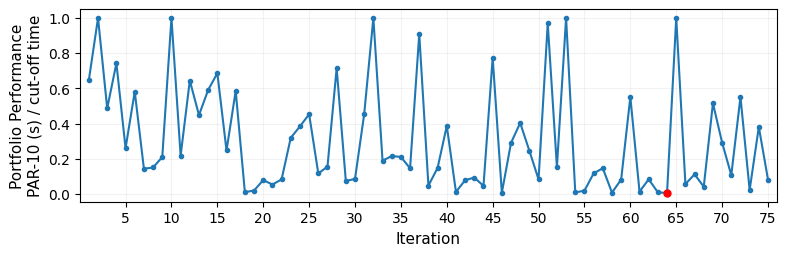

In [3]:
db_path = BASE_DIR / "10" / "200" / "database" / "run-plain-30-980892.db"
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)


_ = results.loc[lambda x: x["prefix"].str.startswith("config")].copy() 
_["cost"] /= 8.9

_.loc[:, "aac_iter"] = _["prefix"].str.extract(r'aac_iter=(\d+)').astype(int)
_ = _.groupby(["aac_iter", "instance_id"]).agg({"cost": "min"}).reset_index()
_ = _.groupby("aac_iter").agg({"cost": "mean"}).reset_index()
_ = _.sort_values("aac_iter")

fig, ax = plt.subplots(figsize=(9, 2.5))
ax.plot(_["aac_iter"], _["cost"], marker="o", markersize=3)
min_cost_idx = _["cost"].idxmin()
ax.plot(_["aac_iter"][min_cost_idx], _["cost"][min_cost_idx], 'ro', markersize=5)

ax.set_xticks(_["aac_iter"][4::5])
ax.set_xlabel("Iteration", fontsize=11)
ax.set_ylabel("Portfolio Performance\nPAR-10 (s) / cut-off time", fontsize=11)
ax.set_xlim(0, 76)

plt.savefig("portfolio_performance_200.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
def plot_scaling(db_path, fname):
    db = DB(db_path)
    results = pd.read_sql_query("SELECT * FROM results", db._conn)
    instances = pd.read_sql_query("SELECT * FROM instances", db._conn)
    results["max_cost"] = results["instance_id"].map(instances.set_index("id")["max_cost"])
    _ = results.loc[lambda x: x["prefix"].str.startswith("config")].copy() 
    _["cost"] /= _["max_cost"]

    _.loc[:, "aac_iter"] = _["prefix"].str.extract(r'aac_iter=(\d+)').astype(int)
    _ = _.groupby(["aac_iter", "instance_id"]).agg({"cost": "min"}).reset_index()
    _ = _.groupby("aac_iter").agg({"cost": "mean"}).reset_index()
    _ = _.sort_values("aac_iter")

    fig, ax = plt.subplots(figsize=(9, 2.5))
    ax.plot(_.loc[0:24, "aac_iter"], _.loc[0:24, "cost"], marker="o", markersize=3, color="C0")
    min_cost_idx = _.loc[0:24, "cost"].idxmin()
    ax.plot(_["aac_iter"][min_cost_idx], _["cost"][min_cost_idx], 'o', markersize=7)

    ax.plot(_.loc[25:49, "aac_iter"], _.loc[25:49, "cost"], marker="o", markersize=3, color="C1")
    min_cost_idx = _.loc[25:49, "cost"].idxmin()
    ax.plot(_["aac_iter"][min_cost_idx], _["cost"][min_cost_idx], 'o', markersize=7)
    ax.plot([26], _["cost"][25], 'o', markersize=7, c="C0")


    ax.plot(_.loc[50:74, "aac_iter"], _.loc[50:74, "cost"], marker="o", markersize=3, color="C2")
    min_cost_idx = _.loc[50:74, "cost"].idxmin()
    ax.plot(_["aac_iter"][min_cost_idx], _["cost"][min_cost_idx], 'o', markersize=7)
    ax.plot([51], _["cost"][50], 'o', markersize=7, c="C1")


    ax.set_xticks(_["aac_iter"][4::5])
    ax.set_xlabel("Iteration", fontsize=11)
    ax.set_ylabel("Portfolio Performance\nPAR-10 (s) / cut-off time", fontsize=11)
    ax.set_xlim(0, 76)

    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.show()

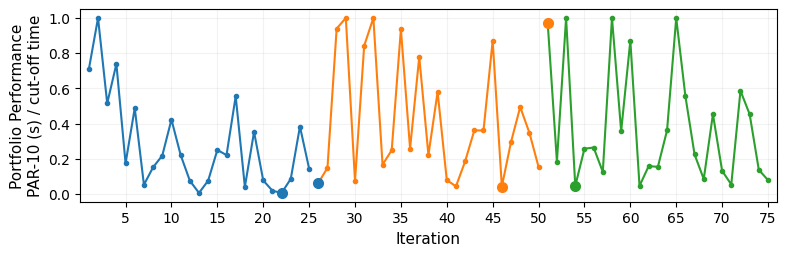

In [5]:
db_path = BASE_DIR / "10" / "200_400_600" / "database" / "run-plain-30-scaling-981436.db"
fname = "portfolio_performance_200_400_600__10__30.png"
plot_scaling(db_path, fname)

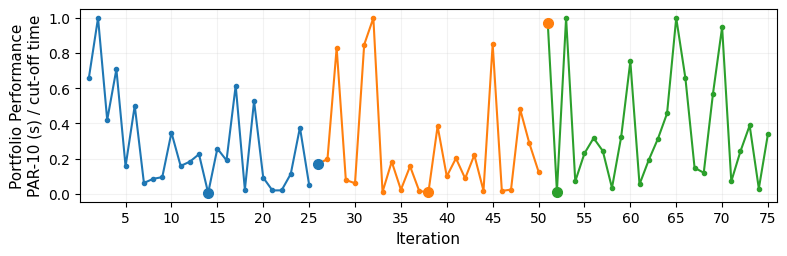

In [6]:
db_path = BASE_DIR / "10" / "200_400_600" / "database" / "run-plain-250-scaling-981442.db"
fname = "portfolio_performance_200_400_600__10__250.png"
plot_scaling(db_path, fname)

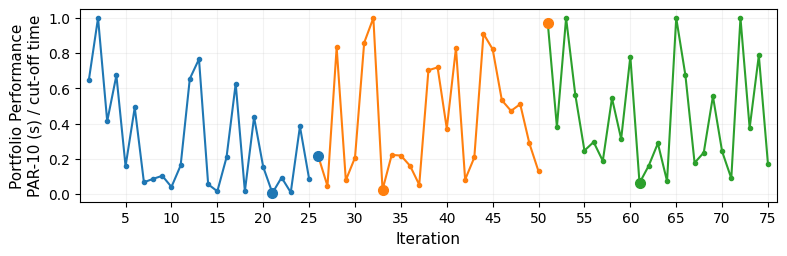

In [9]:
db_path = BASE_DIR / "10" / "200_400_600" / "database" / "run-plain-500-scaling-981558.db"
fname = "portfolio_performance_200_400_600__10__500.png"
plot_scaling(db_path, fname)

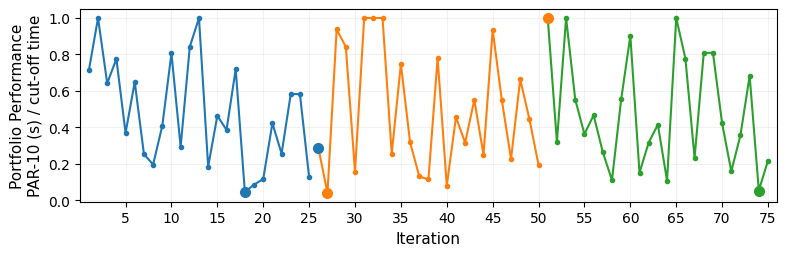

In [28]:
db_path = BASE_DIR / "531" / "200_400_600" / "database" / "run-plain-30-scaling-983571.db"
fname = "portfolio_performance_200_400_600__266__30.png"
plot_scaling(db_path, fname)